<a href="https://colab.research.google.com/github/riddhigarg26/Beer-Volume/blob/main/BeerVolume_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries**

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

**Prophet** is an open source time series forecasting algorithm designed by Facebook. Prophet builds a model by finding a best smooth line which can be represented as a sum of the following components:

y(t) = g(t) + s(t) + h(t) + ϵₜ 
where, 

Overall growth trend is g(t);
Yearly seasonality is s(t);
Weekly seasonality is s(t);
Holidays effects is h(t)

In [ ]:
df = pd.read_excel('/content/BeerVol.xlsx')
df.dropna(inplace= True)

In [ ]:
df = df[['Period', 'Volume_KHL']]
df.head()

,Period,Volume_KHL
0,2018-01-01,1428.628676
1,2018-02-01,1105.987315
2,2018-03-01,989.255486
3,2018-04-01,898.527092
4,2018-05-01,746.152541


**Doing initial analysis and changing the naming format to the one pre-defined in FBProphet**

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
120,2019-01-01,1340.715856
121,2019-02-01,1153.592669
122,2019-03-01,1110.424278
123,2019-04-01,901.237691
124,2019-05-01,776.311703


**Plotting the time-series graph**

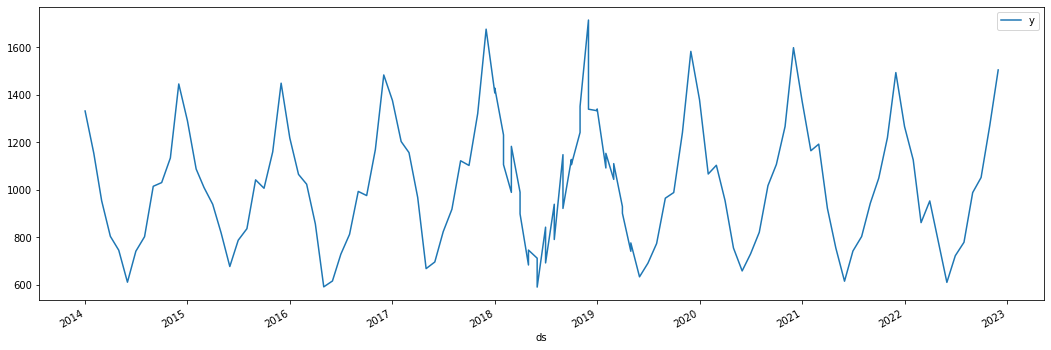

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

From the above graph, we can observe that the model has seasonality (it increases every year during the month of December - as noticed in our first notebook), hence it has to be converted into a stationary series first. FBProphet takes care of this internally.

In [ ]:
len(df)

125

In [ ]:
df['ds'].max()

Timestamp('2022-12-01 00:00:00')

**Train-test split**

In [ ]:
train = df.iloc[:len(df)-30]
test = df.iloc[len(df)-30:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=730) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
820,2024-11-26,1017.875295,1495.450652,1629.020098,1017.337832,1018.372056,543.051334,543.051334,543.051334,543.051334,543.051334,543.051334,0.0,0.0,0.0,1560.926629
821,2024-11-27,1017.880752,1494.995555,1626.207319,1017.341999,1018.377474,541.366082,541.366082,541.366082,541.366082,541.366082,541.366082,0.0,0.0,0.0,1559.246834
822,2024-11-28,1017.886208,1487.607410,1614.607117,1017.346302,1018.382891,533.305472,533.305472,533.305472,533.305472,533.305472,533.305472,0.0,0.0,0.0,1551.191680
823,2024-11-29,1017.891664,1473.879632,1600.269788,1017.350591,1018.388309,519.160425,519.160425,519.160425,519.160425,519.160425,519.160425,0.0,0.0,0.0,1537.052089
824,2024-11-30,1017.897120,1449.282066,1580.413824,1017.354710,1018.393772,499.396355,499.396355,499.396355,499.396355,499.396355,499.396355,0.0,0.0,0.0,1517.293476


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
820,2024-11-26,1560.926629,1495.450652,1629.020098
821,2024-11-27,1559.246834,1494.995555,1626.207319
822,2024-11-28,1551.191680,1487.607410,1614.607117
823,2024-11-29,1537.052089,1473.879632,1600.269788
824,2024-11-30,1517.293476,1449.282066,1580.413824


In [ ]:
test.tail()

,ds,y
120,2019-01-01,1340.715856
121,2019-02-01,1153.592669
122,2019-03-01,1110.424278
123,2019-04-01,901.237691
124,2019-05-01,776.311703


**Plotting the predicted data**

In [ ]:
plot_plotly(m ,forecast)

You can move the handles given in the bottom graph to move around and see the predicted values for 2023 and 2024. 
Recommended strategies to boost the sales:
1. Good discounts can be given for the next 6 months (ie till the May-June of 2023), especially during special holidays like the Flag day, Labour day, Argentina Independence Day etc.
2. Since the FIFA is not drastically increasing the sales as of now, some discount schemes can be generated to cash in on the sales during the FIFA season.
3. Similar schemes can be used to boost sales during the summer of 2024 as well. 
4. In the next two years, release of a special beer which caters specifically to the tastes of people of Argentina can be made and released during a special holiday or during a quarter when the GDP rate is higher.

In [ ]:
plot_components_plotly(m, forecast)

**Looking at the error and mean values**

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions = forecast.iloc[-30:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  379.65653788678156
Mean Value of Test Dataset: 1104.4220068560269
